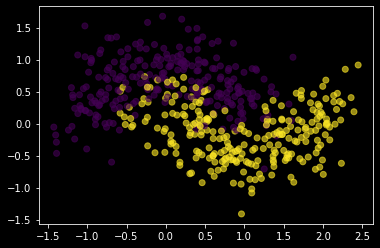

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

X, y =make_moons(n_samples=500,noise=0.3,random_state=0)

plt.scatter(X[:,0],X[:,1],c=y, alpha=0.6)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

## Voting Classifier

In [6]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import VotingClassifier

model_1 = SGDClassifier(random_state=0)
model_2 = DecisionTreeClassifier(random_state=0)
model_3 = KNeighborsClassifier(n_neighbors=2)

model_V = VotingClassifier([('SGD',model_1),('Tree',model_2),('KNN',model_3)],voting='hard')

for model in (model_1,model_2,model_3,model_V):
    model.fit(X_train,y_train)
    print(model.__class__.__name__,model.score(X_test,y_test))

SGDClassifier 0.84
DecisionTreeClassifier 0.86
KNeighborsClassifier 0.86
VotingClassifier 0.8733333333333333


## Bagging

In [8]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier

model_B = BaggingClassifier(base_estimator=KNeighborsClassifier(),n_estimators=100)

model_B.fit(X_train,y_train)
model_B.score(X_test,y_test)

0.8866666666666667

In [9]:
model_RF = RandomForestClassifier(n_estimators=100)
model_RF.fit(X_train,y_train)
model_RF.score(X_test,y_test)

0.88